In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
from pathlib import Path

# import plotly.express as px

ROOT = Path('../../stabilizing_volatility')
DATA = Path('G:/UNIPA/ECONOFISICA/DATA/BLOOMBERG')
print(DATA)
for dir in DATA.iterdir():
    print(dir)

G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\.~lock.JT.xlsx#
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\dataset.txt
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\GF.csv
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\GF.orc
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\GF.xlsx
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\Instruction.docx
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\JT.csv
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\JT.orc
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\JT.xlsx
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\LN.csv
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\LN.orc
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\LN.xlsx
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\UN.csv
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\UN.orc
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\UN.xlsx
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\UW.csv
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\UW.orc
G:\UNIPA\ECONOFISICA\DATA\BLOOMBERG\UW.xlsx


In [2]:
def read_raw_data(market):
    raw_data = DATA / f'{market}.csv'
    df = pd.read_csv(raw_data,
                     index_col=0,
                     skiprows=[1],
                     sep=';',
                     decimal=',',
                     parse_dates=True,
                     infer_datetime_format=True,
                     na_values=['#N/D'])
    df.rename(columns=lambda x: x.replace(f' {market} Equity', ''), inplace=True)
    df.index.name = 'Day'
    # Order columns by number of values
    ordered_columns_list = df.isnull().sum().sort_values().index
    df = df.loc[:, ordered_columns_list]
    return df

def manipulate_dataframe(df):
    # Order columns by number of values
    ordered_columns_list = df.isnull().sum().sort_values().index
    df = df.loc[:, ordered_columns_list]
    # Convert index format for easier visualization
    df.index = pd.to_datetime(df.index).strftime("%Y")
    return df

def make_plot(df, market):
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.heatmap(df.isnull().T,
                yticklabels=False,
                xticklabels=365,
                cmap='gray',
                cbar=False,
                ax=ax)
    ax.set_title(f'Missing data in {market} market', fontsize=24)
    ax.set_ylabel('Stocks', fontsize=24)
    ax.set_xlabel('Days', fontsize=24)
    ax.grid(visible=True, ls='--')
    return ax

# Markets analysis

## UW

E:\Temp\ipykernel_18388\2157876495.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(raw_data,


Timestamp('1980-01-01 00:00:00')

Timestamp('2022-07-01 00:00:00')

(15523, 1588)

<Axes: title={'center': 'Missing data in UW market'}, xlabel='Days', ylabel='Stocks'>

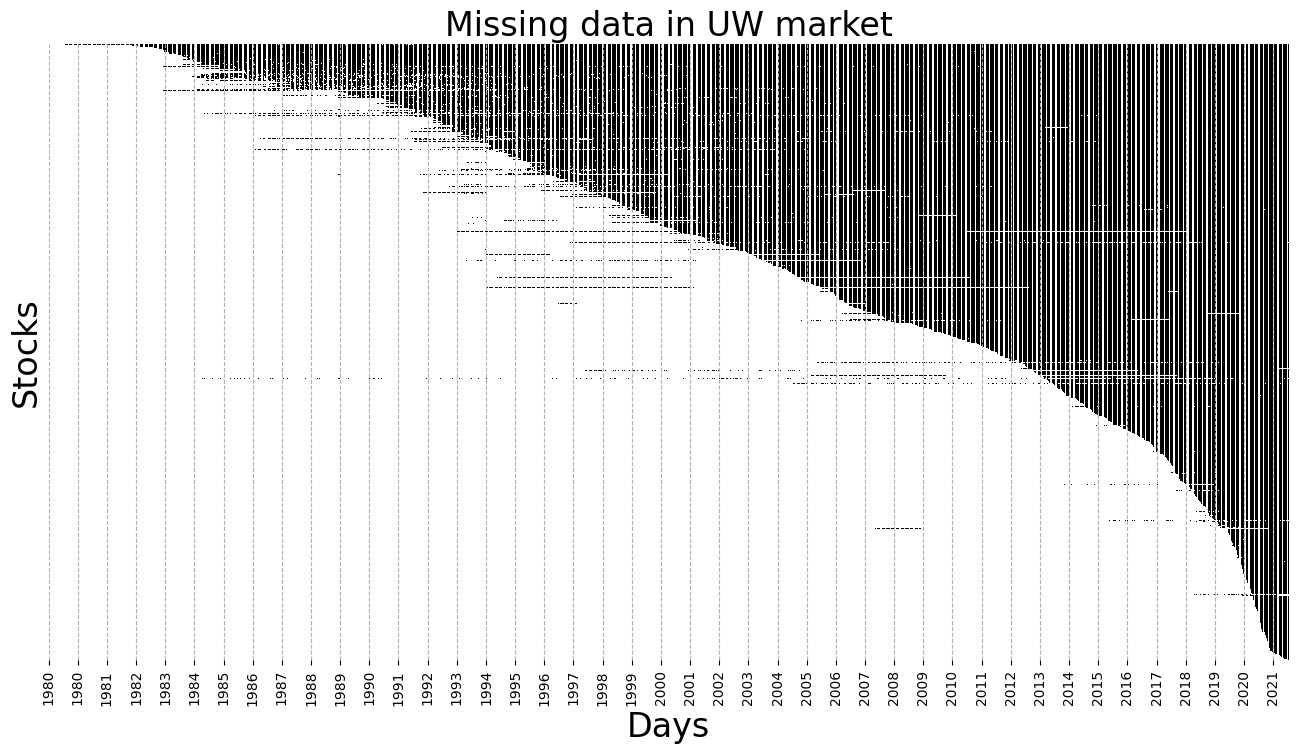

In [3]:
market = 'UW'
df = read_raw_data(market)
display(df.index[0])
display(df.index[-1])
display(df.shape)
df = manipulate_dataframe(df)
make_plot(df, market)

## GF

In [ ]:
market = 'GF'
df = read_raw_data(market)
display(df.index[0])
display(df.index[-1])
display(df.shape)
df = manipulate_dataframe(df)
make_plot(df, market)

## JT

In [ ]:
market = 'JT'
df = read_raw_data(market)
display(df.index[0])
display(df.index[-1])
display(df.shape)
df = manipulate_dataframe(df)
make_plot(df, market)

## LN

In [ ]:
market = 'LN'
df = read_raw_data(market)
display(df.index[0])
display(df.index[-1])
display(df.shape)
df = manipulate_dataframe(df)
make_plot(df, market)

## UN Market

In [ ]:
market = 'UN'
df = read_raw_data(market)
display(df.index[0])
display(df.index[-1])
display(df.shape)
df = manipulate_dataframe(df)
make_plot(df, market)

In [ ]:
df = pd.read_pickle(ROOT/'data/raw/UW.pickle').reset_index()
mini = df.loc[14000:, ['AAPL', 'INTC']].dropna()
mini = (mini - mini.mean())/mini.std()
mini.plot(grid=False, figsize=(8, 4))

In [ ]:
px.line(mini['INTC'])